# 🤖 Proyecto Machine Learning
## 🥊 Predicción de combates Pokemon
En este proyecto se entrenará un modelo para que realice predicciones sobre el ganador de un combate pokemon en función de su tipo, estadisiticas base y ataques.

`@author Daniel Ramírez Vaquero`

In [27]:
# %pip install numpy matplotlib pandas scikit-learn seaborn

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtención de datos

Fuentes:
- Pokemons_dataset: Kaggle (Proveniente del sitio oficila de Pokemon).
- Combats_dataset: Kaggle (Creado a mano a partir de combates reales).

<a href="https://www.kaggle.com/datasets/tuannguyenvananh/pokemon-dataset-with-team-combat?resource=download">Enlace de descarga ⬇️</a>

In [29]:
try:
  pokemon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA/datasets/pokemon.csv')
  combats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA/datasets/combats.csv')
except FileNotFoundError:
  pokemon = pd.read_csv('./data/pokemon.csv')
  combats = pd.read_csv('./data/combats.csv')

## Exploración y visualización de datos

In [30]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Atributos dataset `pokemon`:

- `#`: Id del pokemon
- `Name`: Nombre del pokemon
- `Type 1`: Tipo principal
- `Type 2`: Tipo secundario
- `HP`: Vida (Hit Points)
- `Attack`: Daño de ataque
- `Defense`: Defensas
- `Sp.Atk`: Velocidad de ataque
- `Sp.Def`: Velocidad de defensa
- `Speed`: Velocidad
- `Generation`: Generación
- `Legendary`: Indica si el pokemon es legendario o no

In [31]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


Atriburos dataset `combats`:

- `First_pokemon`: Id del primer pokemon del combate
- `Second_pokemon`: Id del segundo pokemon del combate
- `Winner`: Id del pokemon ganador

In [32]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


Observaciones:

- Hay algunos pokemons que no tienen `Type 2`, pero esto no es un error del dataset, hay pokemons monotipo.
- Tenemos datos en tipo `object` (string), `int` y un dato `boolean`.

Veamos cuantos tipos principales de pokemon hay y cuantos hay de cada uno.

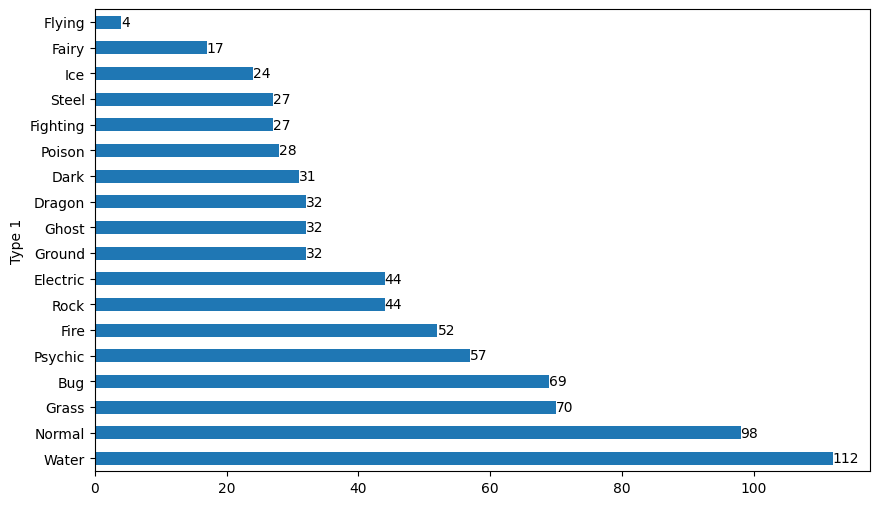

In [33]:
df_type1 = pokemon['Type 1'].value_counts()

ax = df_type1.plot.barh()

ax.figure.set_size_inches(10, 6)

ax.bar_label(ax.containers[0])
plt.show()

Veamos en general las estadísticas de los pokemons

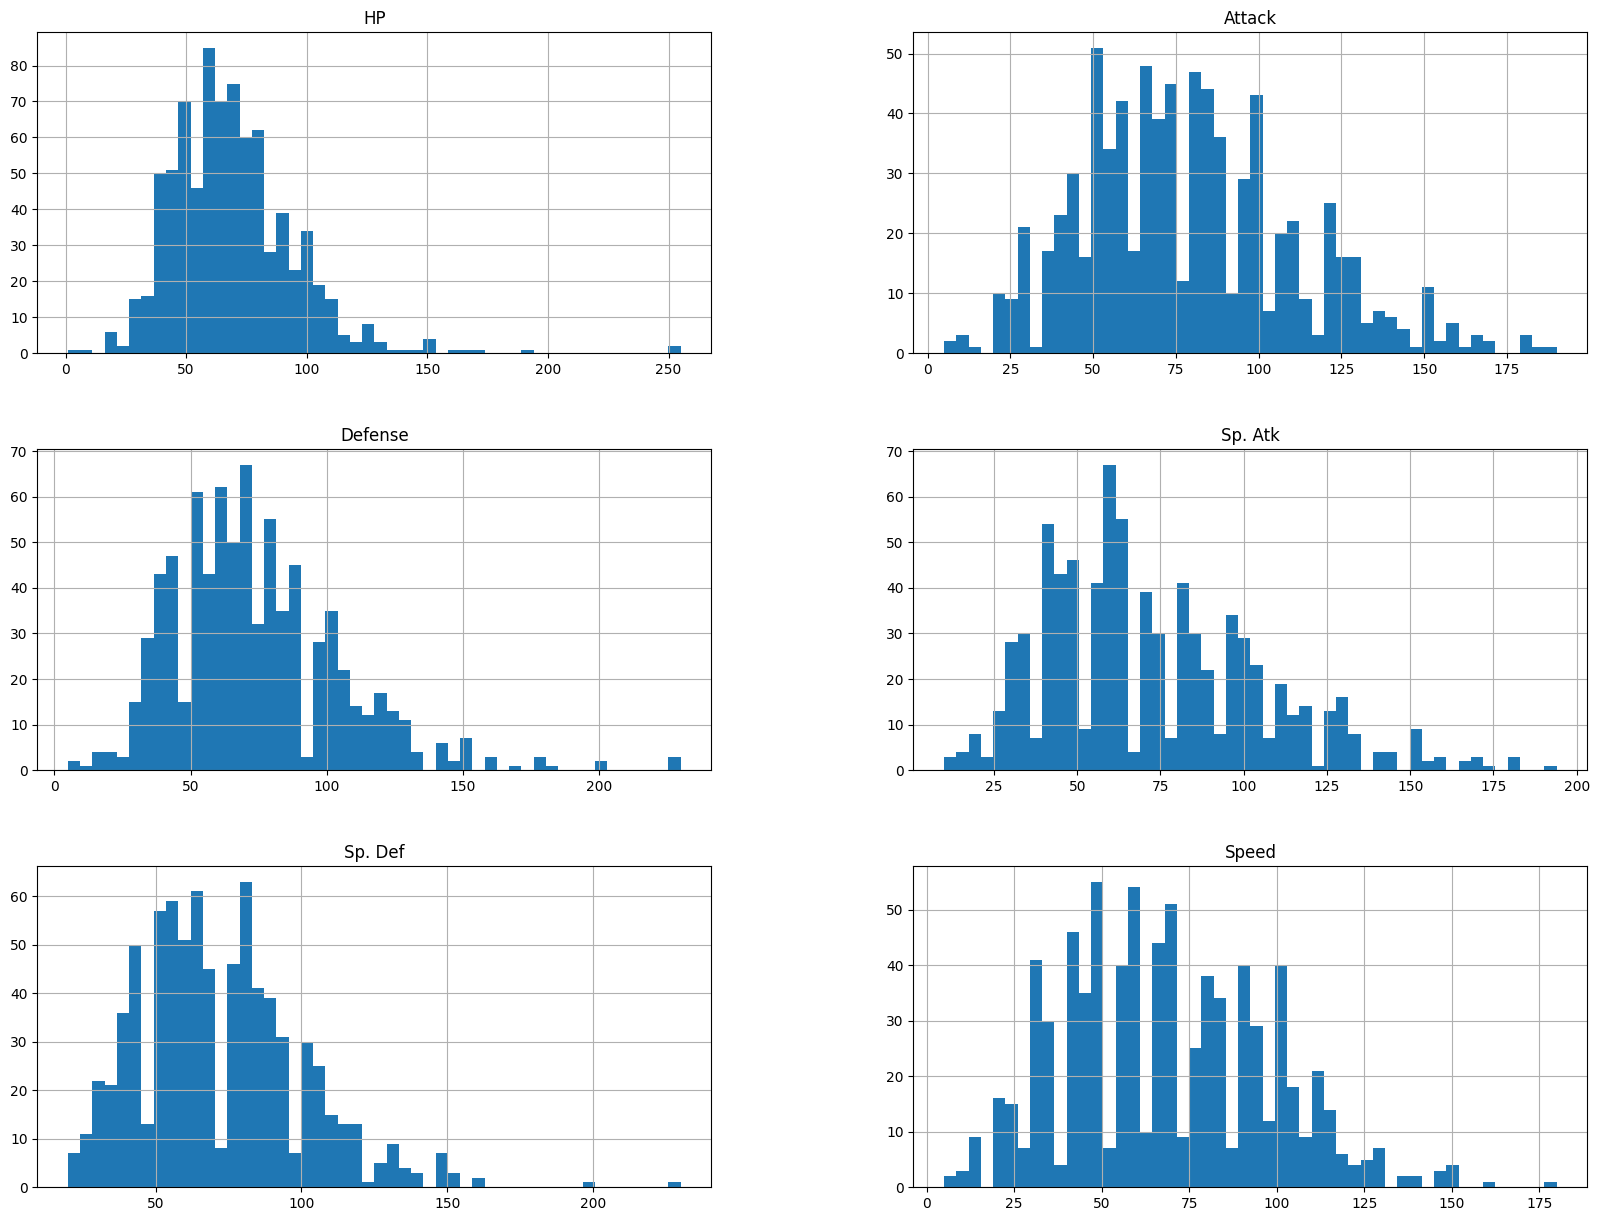

In [34]:
pokemons_stats = pokemon.drop(columns=['#', 'Generation', 'Legendary'])

pokemons_stats.hist(bins=50, figsize=(20,15))
plt.show()

Veamos que estadísticas son las más relevantes para el pokemon ganador.

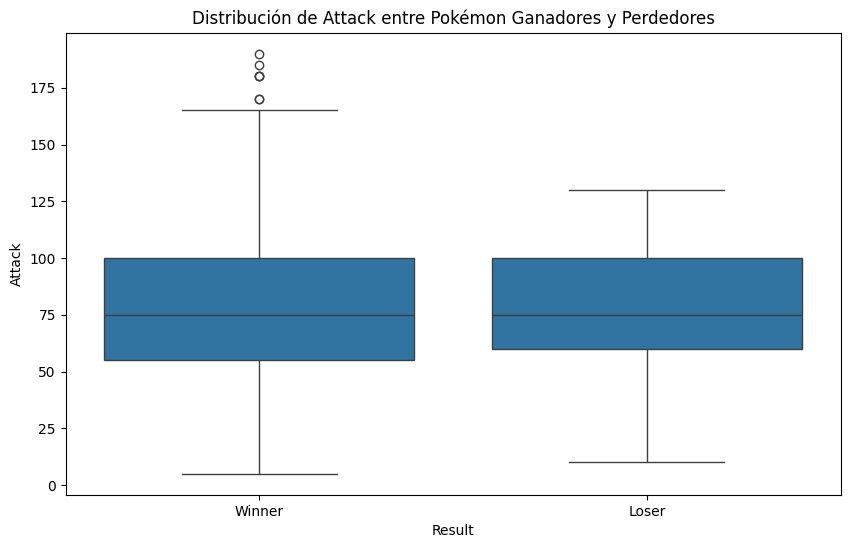

In [35]:
# Renombrar la columna '#' a 'Id' si no se ha hecho ya
pokemon.rename(columns={'#': 'Id'}, inplace=True)

# Suponiendo que 'Winner' indica si un Pokémon ha ganado o no
# y que tienes una columna 'Result' donde 'Winner' y 'Loser' están etiquetados
pokemon['Result'] = pokemon['Id'].apply(lambda x: 'Winner' if x in combats['Winner'].values else 'Loser')

# Ajusta 'stat_column' a la estadística que quieras visualizar: 'HP', 'Attack', etc.
stat_column = 'Attack'
plt.figure(figsize=(10, 6))
sns.boxplot(data=pokemon, x='Result', y=stat_column)
plt.title(f'Distribución de {stat_column} entre Pokémon Ganadores y Perdedores')
plt.show()

Tambien podemos ver que tipos de pokemon tiene mayor WinRate

C:\Users\d.ramirez.vaquero\AppData\Local\Temp\ipykernel_24980\759465632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=winners, x='Type 1', order=winners['Type 1'].value_counts().index, palette="viridis")


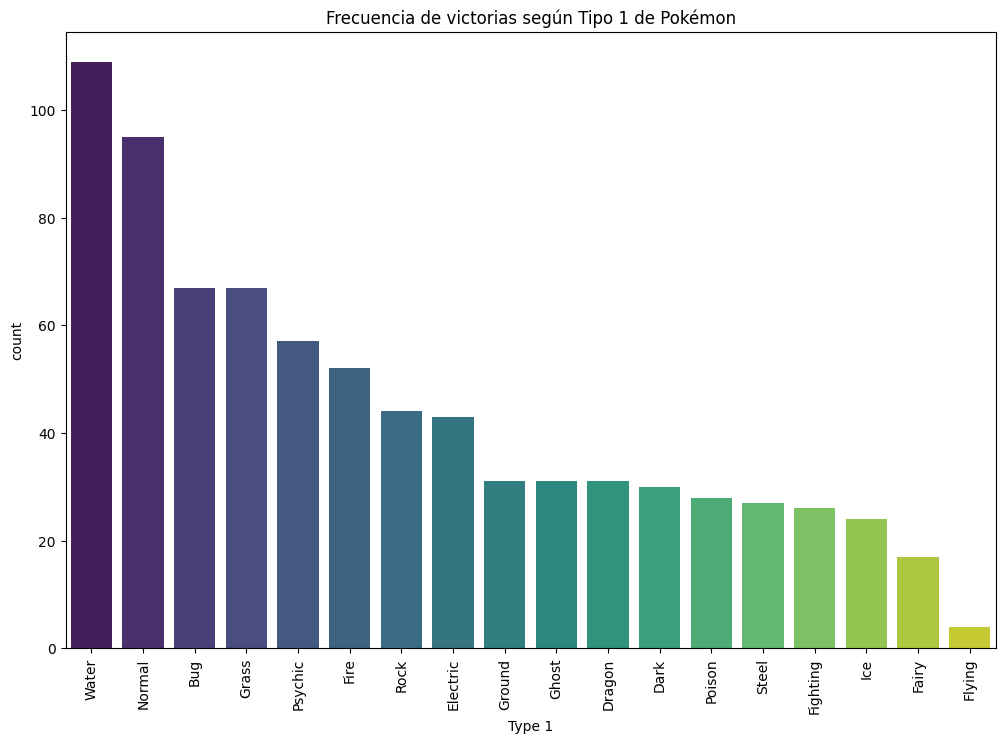

In [36]:
# Crea una columna de 'Ganador' para cada tipo de Pokémon
winners = pokemon[pokemon['Id'].isin(combats['Winner'])]
plt.figure(figsize=(12, 8))
sns.countplot(data=winners, x='Type 1', order=winners['Type 1'].value_counts().index, palette="viridis")
plt.title('Frecuencia de victorias según Tipo 1 de Pokémon')
plt.xticks(rotation=90)
plt.show()

Y por último podemos ver si las generaciones de los pokemons afectan a los resultados

C:\Users\d.ramirez.vaquero\AppData\Local\Temp\ipykernel_24980\2774387961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=winners, x='Generation', palette='Set2')


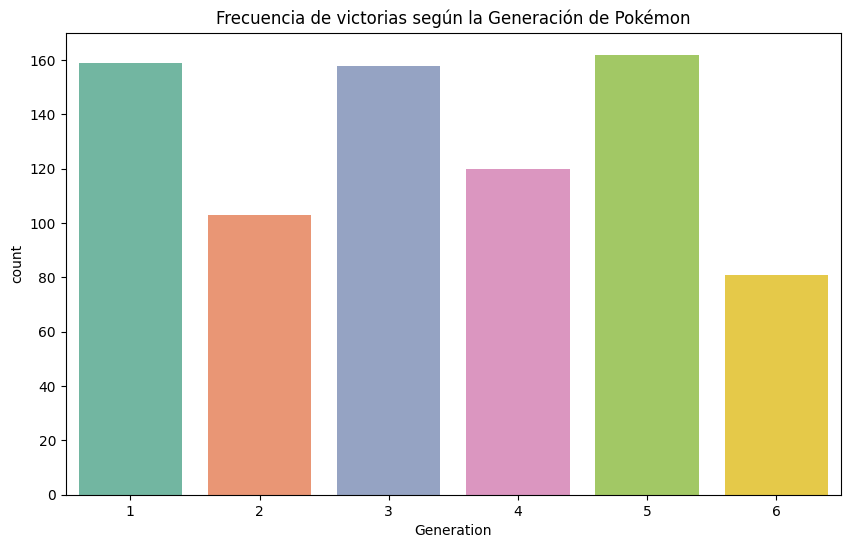

In [37]:
winners = pokemon[pokemon['Id'].isin(combats['Winner'])]
plt.figure(figsize=(10, 6))
sns.countplot(data=winners, x='Generation', palette='Set2')
plt.title('Frecuencia de victorias según la Generación de Pokémon')
plt.show()

## Preparación de los datos
En este caso tendremos que crear un data frame uniendo los datasets de combates y pokemons.

Vamos a ignorar las columnas de `Type 1`, `Type 2` y `Legendary` ya que no son datos numéricos y como hemos visto en las gráficas no son muy relevantes.

También crearemos características para nuestro modelo.

In [38]:
# Primero renombro la columna # para que sea más fácil hacer el join
pokemon.rename(columns={'#': 'Id'}, inplace=True)

# Uno los datos de combates con los datos de los pokemons
combats = combats.merge(pokemon, left_on='First_pokemon', right_on='Id')
combats = combats.merge(pokemon, left_on='Second_pokemon', right_on='Id', suffixes=('_first', '_second'))

# Crear características para el modelo
features = combats[['HP_first', 'Attack_first', 'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
                    'HP_second', 'Attack_second', 'Defense_second', 'Sp. Atk_second', 'Sp. Def_second', 'Speed_second']]

# En labels guardo la columna Winner que será el target
labels = combats['Winner']

### Gestión de nulos

Comprobamos si tenemos algún nulo en los datos que hemos preparado

In [39]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   HP_first        50000 non-null  int64
 1   Attack_first    50000 non-null  int64
 2   Defense_first   50000 non-null  int64
 3   Sp. Atk_first   50000 non-null  int64
 4   Sp. Def_first   50000 non-null  int64
 5   Speed_first     50000 non-null  int64
 6   HP_second       50000 non-null  int64
 7   Attack_second   50000 non-null  int64
 8   Defense_second  50000 non-null  int64
 9   Sp. Atk_second  50000 non-null  int64
 10  Sp. Def_second  50000 non-null  int64
 11  Speed_second    50000 non-null  int64
dtypes: int64(12)
memory usage: 4.6 MB


In [40]:
labels.head()

0    298
1    701
2    668
3    683
4    151
Name: Winner, dtype: int64

### Separación de la matriz de características $X$ de los datos de salida $y$ (target)


In [41]:
y = labels
y

0        298
1        701
2        668
3        683
4        151
        ... 
49995    707
49996    589
49997    368
49998    109
49999      9
Name: Winner, Length: 50000, dtype: int64

In [42]:
X = features
X

,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second
0,50,64,50,45,50,41,70,70,40,60,40,60
1,91,90,72,90,129,108,91,129,90,72,90,108
2,55,40,85,80,105,40,75,75,75,125,95,40
3,40,40,40,70,40,20,77,120,90,60,90,48
4,70,60,125,115,70,55,20,10,230,10,230,5
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,30,40,70,70,25,60
49996,60,85,40,30,45,68,35,55,40,45,40,60
49997,60,50,100,85,70,65,73,115,60,60,60,90
49998,40,30,50,55,55,100,25,35,70,95,55,45


### Creación de los datos de entramiento y prueba

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [44]:
X_train

,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second
39087,50,75,45,40,45,60,50,55,50,36,30,43
30893,70,60,125,115,70,55,65,63,45,45,45,45
45278,70,75,80,135,80,135,80,95,82,60,82,75
16398,95,110,95,40,95,55,75,100,95,40,70,110
13653,45,40,60,40,75,50,40,45,65,100,120,90
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,60,67,85,77,75,116,55,104,105,94,75,52
44732,50,60,60,60,60,30,65,60,70,85,75,40
38158,78,65,68,112,154,75,104,91,63,91,73,68
860,60,45,70,45,90,95,50,65,107,105,107,86


In [45]:
X_test

,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second
33553,85,115,80,105,80,50,80,80,80,80,80,80
9427,100,164,150,95,120,71,39,52,43,60,50,65
199,70,120,65,45,85,125,53,51,53,61,56,40
12447,50,85,125,85,115,20,65,60,70,85,75,40
39489,90,65,65,40,40,15,90,95,95,70,90,70
...,...,...,...,...,...,...,...,...,...,...,...,...
28567,75,75,60,83,60,60,60,80,95,70,85,50
25079,30,105,90,25,25,50,130,85,80,85,95,60
18707,71,95,85,110,95,79,79,105,70,145,80,101
15200,40,40,35,50,100,70,53,54,53,37,46,45


In [46]:
y_train

39087    650
30893    151
45278    340
16398    139
13653    132
        ... 
11284    608
44732    149
38158    740
860      465
15795    350
Name: Winner, Length: 40000, dtype: int64

In [47]:
y_test

33553    548
9427     269
199      513
12447    149
39489     86
        ... 
28567    562
25079    143
18707    706
15200     79
5857     547
Name: Winner, Length: 10000, dtype: int64

Comprobamos que todo ha ido bien visualizando que `X_train` y `X_test` tiene distribuciones similares.

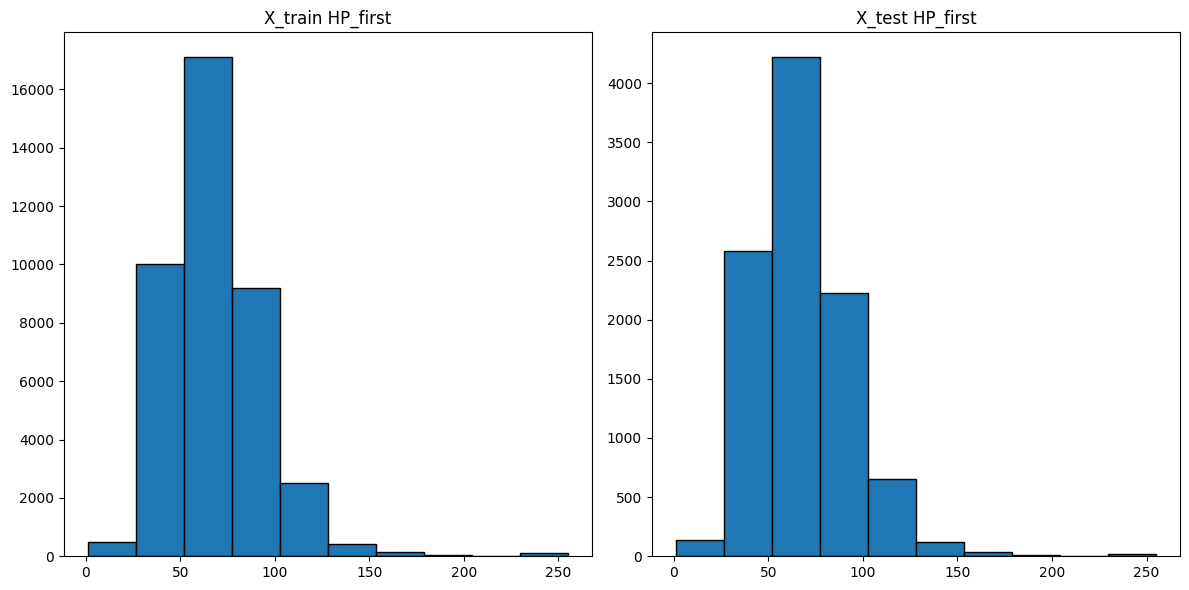

In [48]:
# Convertir X_train y X_test de nuevo a DataFrames para poder usar etiquetas de columna
column_names = ['HP_first', 'Attack_first', 'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
				'HP_second', 'Attack_second', 'Defense_second', 'Sp. Atk_second', 'Sp. Def_second', 'Speed_second']

# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma para X_train_df['HP_first']
axes[0].hist(X_train['HP_first'], edgecolor='black')
axes[0].set_title('X_train HP_first')

# Histograma para X_test_df['HP_first']
axes[1].hist(X_test['HP_first'], edgecolor='black')
axes[1].set_title('X_test HP_first')

# Mostrar la figura con los dos histogramas
plt.tight_layout()
plt.show()

Probamos con otro atributo, `Attack_second`.

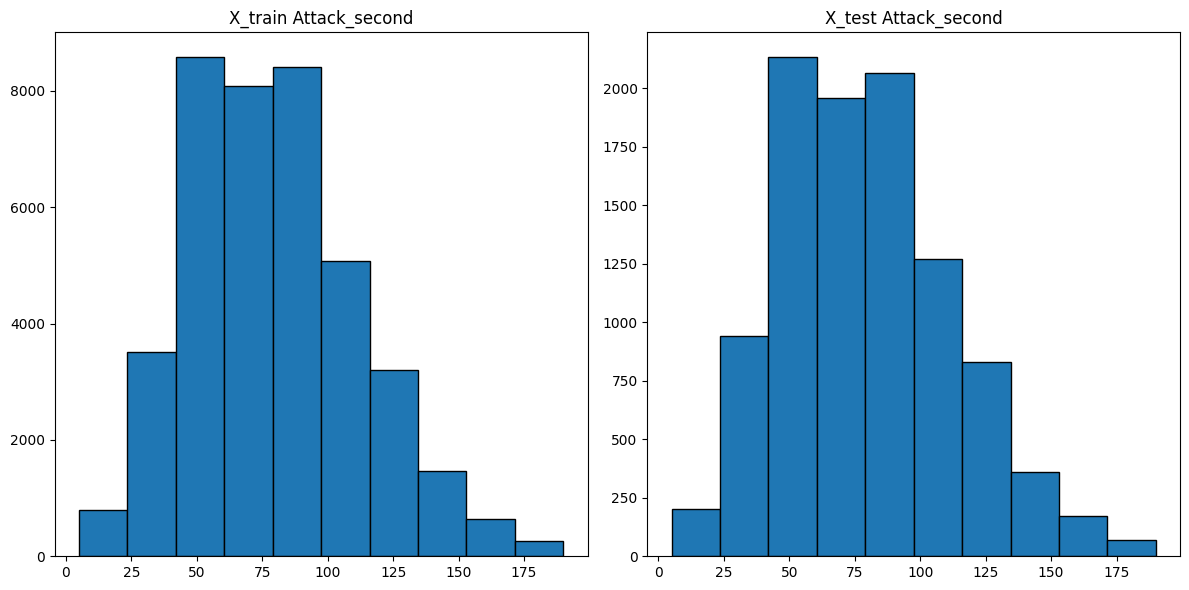

In [49]:
# Crear una figura con dos subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma para X_train['housing_median_age']
axes[0].hist(X_train['Attack_second'], edgecolor='black')
axes[0].set_title('X_train Attack_second')

# Histograma para X_test['housing_median_age']
axes[1].hist(X_test['Attack_second'], edgecolor='black')
axes[1].set_title('X_test Attack_second')

# Mostrar la figura con los dos histogramas
plt.tight_layout()
plt.show()

## Entrenamiento del modelo

Vamos a probar varios algoritmos de entrenamiento e indicaremos cual es el que da mejores resultados.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

models = {
  "Linear Regression": LinearRegression(),
  "Decision Tree": DecisionTreeRegressor(),
  "Random Forest": RandomForestRegressor()
}

results = []

for name, model in models.items():
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  rmse = root_mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)

  result_df = pd.DataFrame({
    'Real': y_test,
    'Predicted': predictions.astype(int),
    'Correct': y_test == predictions
  })

  results.append({
    'Model': name,
    'RMSE': round(rmse, 2),
    'R2 Score': round(r2, 2),
    'Result DataFrame': result_df
  })

  print(f"Model: {name}")
  print(f"Root Mean Squared Error: {round(rmse, 2)}")
  print(f"R2 Score: {round(r2, 2)}")
  print(result_df.head())
  print("\n")

Model: Linear Regression
Root Mean Squared Error: 228.66
R2 Score: 0.02
       Real  Predicted  Correct
33553   548        439    False
9427    269        422    False
199     513        374    False
12447   149        424    False
39489    86        435    False


Model: Decision Tree
Root Mean Squared Error: 173.26
R2 Score: 0.44
       Real  Predicted  Correct
33553   548        548     True
9427    269        424    False
199     513        513     True
12447   149        665    False
39489    86         86     True


Model: Random Forest
Root Mean Squared Error: 111.53
R2 Score: 0.77
       Real  Predicted  Correct
33553   548        482    False
9427    269        313    False
199     513        513     True
12447   149        332    False
39489    86         95    False




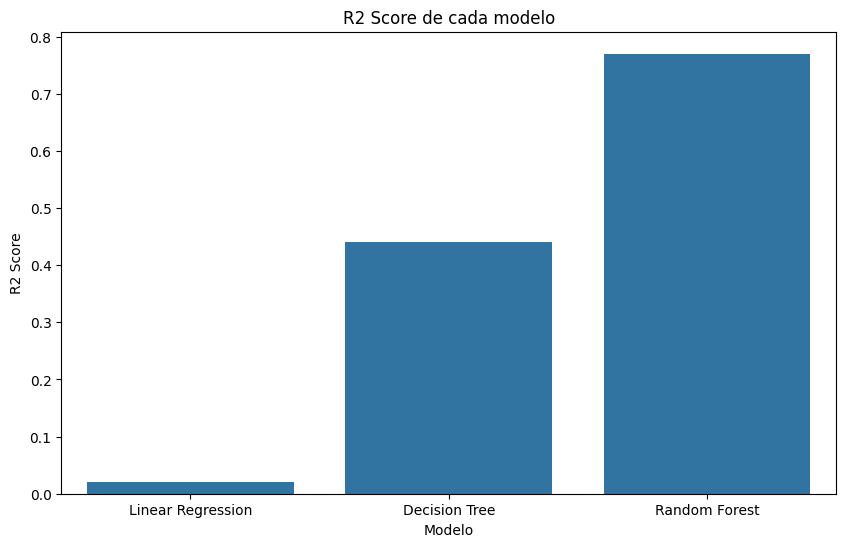

El mejor modelo es Random Forest con un R2 Score de 0.77


In [51]:
# Crear un DataFrame con los resultados para facilitar la visualización
results_df_only_stats = pd.DataFrame(results)

# Crear una gráfica de barras para mostrar el R2 Score de cada modelo
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=results_df_only_stats)
plt.title('R2 Score de cada modelo')
plt.ylabel('R2 Score')
plt.xlabel('Modelo')
plt.show()

best_model = max(results, key=lambda x: x['R2 Score'])
print(f"El mejor modelo es {best_model['Model']} con un R2 Score de {best_model['R2 Score']}")

## Conclusiones
Como podemos ver el modelo que realiza predicciones más precisas y que por lo tanto tiene mejor `R2 Score` es el model entrenado con el algoritmo `RandomForestRegressor()`.

En este caso he obviado los tipos de cada pokemon ya que podían ser conflictivos, vamos a realizar la prueba manteniendo los tipos de cada pokemon para ver que resultados obtenemos.

## Preparación de datos II

In [52]:
try:
  pokemon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA/datasets/pokemon.csv')
  combats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA/datasets/combats.csv')
except FileNotFoundError:
  pokemon = pd.read_csv('./data/pokemon.csv')
  combats = pd.read_csv('./data/combats.csv')

### Gestión de nulos II
Como en este caso vamos a tener en cuenta los tipos, tenemos que gestionar los nulos que hay para el Type 2.

In [53]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Vamos a probar con tres estrategias:
 - Rellenar los `NaN` con el string`'Other'`.
 - Rellenar los `NaN` con el valor más común para `Type 2`.
 - Rellenar los `NaN` con el valor superior, es decir, el de la fila anterior.

In [54]:
# Primero renombro la columna # para que sea más fácil hacer el join posteriormente
pokemon.rename(columns={'#': 'Id'}, inplace=True)

# Convierto la columna Legendary a valores numéricos
pokemon['Legendary'] = pokemon['Legendary'].astype(int)

# Rellenar los valores nulos de la columna Type 2 con la cadena 'Other'
pokemon_other = pokemon.fillna(value={'Type 2': 'Other'})

# Rellenar los valores nulos de la columna Type 2 con el valor más común
print("El valor más común para la columna Type2 es:", pokemon['Type 2'].value_counts().idxmax(), '\n')
pokemon_common = pokemon.fillna(value={'Type 2': 'Flying'})

# Rellenar los valores nulos de la columna Type 2 con el valor anterior
pokemon_prev = pokemon.ffill()

# Contamos los nulos en cada nuevo DataFrame

print("Nulos en Type2 en pokemon_other:",pokemon_other['Type 2'].isnull().sum())
print("Nulos en Type2 en pokemon_common:", pokemon_common['Type 2'].isnull().sum())
print("Nulos en Type2 en pokemon_prev:", pokemon_prev['Type 2'].isnull().sum())


El valor más común para la columna Type2 es: Flying 

Nulos en Type2 en pokemon_other: 0
Nulos en Type2 en pokemon_common: 0
Nulos en Type2 en pokemon_prev: 0


### Separación de la matriz de características $X$ de los datos de salida $y$ (target) II

Preparamos los datos con cada subconjunto con los valores rellenos de diferente manera

In [55]:
# Repido lo mismo para cada tipo de relleno

# NaN rellenados con 'Other' _______________________________________________________
# Uno los datos de combates con los datos de los pokemons
combats_other = combats.merge(pokemon_other, left_on='First_pokemon', right_on='Id')
combats_other = combats_other.merge(pokemon_other, left_on='Second_pokemon', right_on='Id', suffixes=('_first', '_second'))

# Crear características para el modelo
features_other = combats_other[['Type 1_first', 'Type 2_first', 'HP_first', 'Attack_first', 'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first', 'Legendary_first',
      'Type 1_second', 'Type 2_second', 'HP_second', 'Attack_second', 'Defense_second', 'Sp. Atk_second', 'Sp. Def_second', 'Speed_second', 'Legendary_second']]

# NaN rellenados con 'Flying' _______________________________________________________
# Uno los datos de combates con los datos de los pokemons
combats_common = combats.merge(pokemon_common, left_on='First_pokemon', right_on='Id')
combats_common = combats_common.merge(pokemon_common, left_on='Second_pokemon', right_on='Id', suffixes=('_first', '_second'))

# Crear características para el modelo
features_common = combats_common[['Type 1_first', 'Type 2_first', 'HP_first', 'Attack_first', 'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first', 'Legendary_first',
  'Type 1_second', 'Type 2_second', 'HP_second', 'Attack_second', 'Defense_second', 'Sp. Atk_second', 'Sp. Def_second', 'Speed_second', 'Legendary_second']]

# NaN rellenados con el valor anterior _______________________________________________________
# Uno los datos de combates con los datos de los pokemons
combats_prev = combats.merge(pokemon_prev, left_on='First_pokemon', right_on='Id')
combats_prev = combats_prev.merge(pokemon_prev, left_on='Second_pokemon', right_on='Id', suffixes=('_first', '_second'))

# Crear características para el modelo
features_prev = combats_prev[['Type 1_first', 'Type 2_first', 'HP_first', 'Attack_first', 'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first', 'Legendary_first',
        'Type 1_second', 'Type 2_second', 'HP_second', 'Attack_second', 'Defense_second', 'Sp. Atk_second', 'Sp. Def_second', 'Speed_second', 'Legendary_second']]

# En labels guardo la columna Winner que será el target
labels = combats['Winner']

Dado que las columnas Type 1 y Type 2 son de tipo `Object` (string) debemos pasarlas a valores númericos antes de entrenar nuestros modelos, pobaremos 2 estrategias:

- One-Hot Encoding: Esta técnica crea una columna para cada tipo de Pokémon, asignando un valor de 1 si el Pokémon es de ese tipo y 0 en caso contrario.

- Label Encoding: Esta técnica convierte cada tipo en un número único.

In [56]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Aplica one-hot encoding a las columnas 'Type 1' y 'Type 2' para cada conjunto de datos
features_other_encoded = pd.get_dummies(features_other, columns=['Type 1_first', 'Type 2_first', 'Type 1_second', 'Type 2_second'])
features_common_encoded = pd.get_dummies(features_common, columns=['Type 1_first', 'Type 2_first', 'Type 1_second', 'Type 2_second'])
features_prev_encoded = pd.get_dummies(features_prev, columns=['Type 1_first', 'Type 2_first', 'Type 1_second', 'Type 2_second'])


In [57]:
from sklearn.preprocessing import LabelEncoder

# Inicializa el codificador
le = LabelEncoder()

# Aplica label encoding a las columnas de tipo
for col in ['Type 1_first', 'Type 2_first', 'Type 1_second', 'Type 2_second']:
    features_other.loc[:, col] = le.fit_transform(features_other[col])
    features_common.loc[:, col] = le.transform(features_common[col])
    features_prev.loc[:, col] = le.transform(features_prev[col])

Crearemos `X_train` y `X_test` con cada estrategia de gestión de nulos y estrategia de encode para ver cual da mejor resultado.

In [58]:
# División de datos para cada conjunto con One-Hot Encoding
X_train_other_oneHot, X_test_other_oneHot, y_train, y_test = train_test_split(features_other_encoded, labels, test_size=0.2, random_state=42, shuffle=True)
X_train_common_oneHot, X_test_common_oneHot, _, _ = train_test_split(features_common_encoded, labels, test_size=0.2, random_state=42, shuffle=True)
X_train_prev_oneHot, X_test_prev_oneHot, _, _ = train_test_split(features_prev_encoded, labels, test_size=0.2, random_state=42, shuffle=True)

# División de datos para cada conjunto con Label Encoding
X_train_other_label, X_test_other_label, y_train, y_test = train_test_split(features_other, labels, test_size=0.2, random_state=42, shuffle=True)
X_train_common_label, X_test_common_label, _, _ = train_test_split(features_common, labels, test_size=0.2, random_state=42, shuffle=True)
X_train_prev_label, X_test_prev_label, _, _ = train_test_split(features_prev, labels, test_size=0.2, random_state=42, shuffle=True)

## Entrenamiento de los modelos II

In [59]:
# Este bucle prueba los tres algoritmos de entrenamiento para los tres tipos de relleno y muestra cual es el mejor

models = {
  "Linear Regression": LinearRegression(),
  "Decision Tree": DecisionTreeRegressor(),
  "Random Forest": RandomForestRegressor()
}

results = []

subsets = {
  "One-Hot_Other": (X_train_other_oneHot, X_test_other_oneHot),
  "One-Hot_Common": (X_train_common_oneHot, X_test_common_oneHot),
  "One-Hot_Prev": (X_train_prev_oneHot, X_test_prev_oneHot),
  "Label_Other": (X_train_other_label, X_test_other_label),
  "Label_Common": (X_train_common_label, X_test_common_label),
  "Label_Prev": (X_train_prev_label, X_test_prev_label)
}

for subset_name, subset in subsets.items():
  for name, model in models.items():
    model.fit(subset[0], y_train)
    predictions = model.predict(subset[1])

    rmse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    result_df = pd.DataFrame({
      'Real': y_test,
      'Predicted': predictions.astype(int),
      'Correct': y_test == predictions
    })

    results.append({
      'Subset': subset_name,
      'Model': name,
      'RMSE': round(rmse, 2),
      'R2 Score': round(r2, 2),
      'Result DataFrame': result_df
    })

    print(f"Subset: {subset_name}, Model: {name}")
    print(f"Root Mean Squared Error: {round(rmse, 2)}")
    print(f"R2 Score: {round(r2, 2)}")
    print(result_df.head())
    print("\n")
    



Subset: One-Hot_Other, Model: Linear Regression
Root Mean Squared Error: 215.72
R2 Score: 0.13
       Real  Predicted  Correct
33553   548        371    False
9427    269        369    False
199     513        393    False
12447   149        444    False
39489    86        452    False


Subset: One-Hot_Other, Model: Decision Tree
Root Mean Squared Error: 163.19
R2 Score: 0.5
       Real  Predicted  Correct
33553   548        548     True
9427    269        269     True
199     513        513     True
12447   149        214    False
39489    86         86     True


Subset: One-Hot_Other, Model: Random Forest
Root Mean Squared Error: 113.07
R2 Score: 0.76
       Real  Predicted  Correct
33553   548        522    False
9427    269        289    False
199     513        511    False
12447   149        363    False
39489    86         88    False


Subset: One-Hot_Common, Model: Linear Regression
Root Mean Squared Error: 216.01
R2 Score: 0.12
       Real  Predicted  Correct
33553   548   

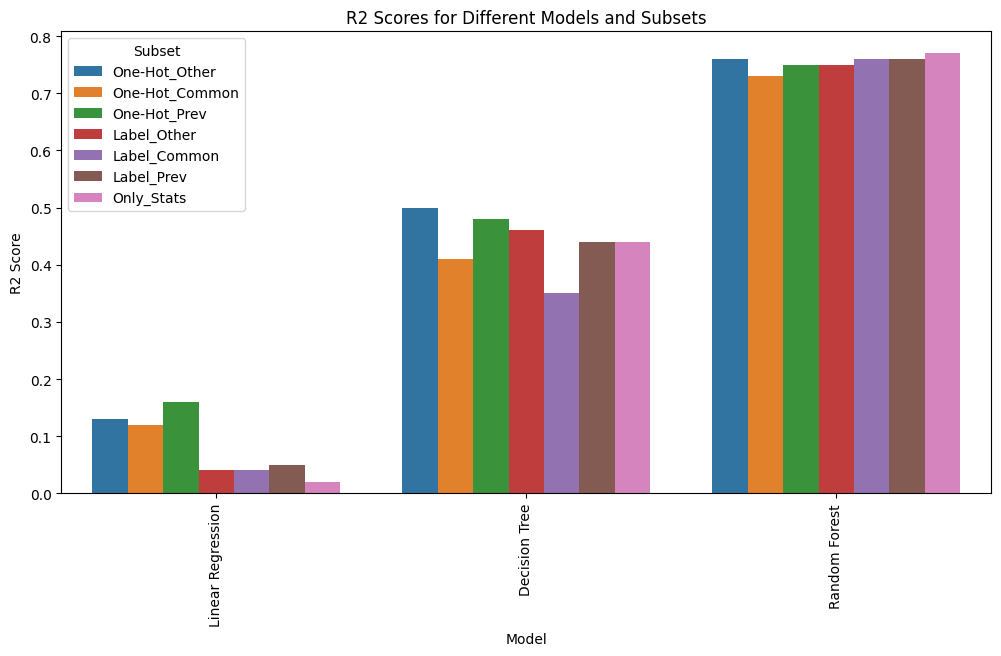

El mejor modelo es Random Forest con un R2 Score de 0.76 y el mejor relleno es One-Hot_Other


In [60]:
# Crear un DataFrame con los resultados para facilitar la visualización
results_df = pd.DataFrame(results)

# Añadir el nuevo subset Only_Stats al DataFrame
results_df_only_stats['Subset'] = 'Only_Stats'
results_df = pd.concat([results_df, results_df_only_stats])

# Crear una gráfica de barras para los R2 Scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2 Score', hue='Subset', data=results_df)
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Models and Subsets')
plt.xticks(rotation=90)
plt.legend(title='Subset')
plt.show()

best_model = max(results, key=lambda x: x['R2 Score'])
print(f"El mejor modelo es {best_model['Model']} con un R2 Score de {best_model['R2 Score']} y el mejor relleno es {best_model['Subset']}")

## Conclusiones finales

Podemos ver que incluir los tipos de los pokemons y si son o no legendarios no ayudan a mejorar la precisión de los diferente modelos, en algunos de ellos, como por ejemplo el entrenado con `LinearRegression` estos datos le hacen tener incluso sobre todo con `Label Encoder`.

Por lo tanto mi conclusión final es que el mejor algoritmo de entrenamiento es el `Random Forest` con el `One Hot encoder` sustituyendo los tipos NaN con la palabra 'Other'. Además podemos añadir que como habiamos concluido en primera instancia, los datos de tipo de cada pokemon no son realmente relevante en el combate.


In [61]:
results_df_only_stats

,Model,RMSE,R2 Score,Result DataFrame,Subset
0,Linear Regression,228.66,0.02,Real Predicted Correct 33553 548 ...,Only_Stats
1,Decision Tree,173.26,0.44,Real Predicted Correct 33553 548 ...,Only_Stats
2,Random Forest,111.53,0.77,Real Predicted Correct 33553 548 ...,Only_Stats
